# Contents
- Dataset Loading
- Model Building
    - Simple Linear
- Model Output / Analysis

## About
We will walk through the simplest possible DNN model training implimentations.

# Dataset Loading
The MNIST dataset is one of the most popular image datasets to work with. Each dataset has its one format / file structure, so do not be suprised if trying other datasets involves some fine tuning.

You can use [Kaggle](https://www.kaggle.com/c/digit-recognizer/data) for downloading the data. Note that the training csv is the only file you can realistically train on, since the test set does not have labels.

You can also go to the original dataset [here](http://yann.lecun.com/exdb/mnist/). Below, we will be using this dataset, however Kaggle is probably one of the greatest ways to get started in machine learning due to the ease of dataset finding and downloading.

When you unzip it, you will find these:
![imagetxt](../../res/mnist_files.png)

Kind of weird. It's just some kind of ubyte file. Commonly most datasets have a csv format which is certainly easier. So lets do just that and make these csvs!

In `pytorch_tensorflow_image_ml/utils` we have a file called `mnist_conversion.py`. This is a file created by others for handling this dataset. Not sure why the authors didn't just make the dataset as a csv, however I think the ubyte format makes it as small as possible, as well as allowing you to convert the entire dataset into any file format you would want. The folder should look like this:
![imagetxt](../../res/mnist_with_converter.png)

`cd` into the folder and call `python mnist_conversion.py` and we should get:
![imagetxt](../../res/mnist_converter_result.png)

Awesome! We have the csvs! But wait... Where are the images? First we need to structure the project a little. Typically our projects involve some structure like so:
![imagetxt](../../res/project_data_structure_view.png)

Some important notes, normally the data folder is in the the highest / 2nd higher directory so that any of the submodules can use it. Also, if you are using version control, having all the data in a single directory makes gitignoring it a lot easier. *Trying to push a large number of images / data into a VCS is, and has been, extremely messy.*

Ok.

We have th csvs, lets see what is in them!

In [2]:
from pytorch_tensorflow_image_ml.utils.file_handling import get_absolute_path
absolute_path_to_mnist = get_absolute_path('mnist')
print(absolute_path_to_mnist)

"""
This is what the absolute path to the mnist directory looks like. You can either:
A. Manually make a full string to your mnist dir
B. Use relative pathing to the data dir ex: ../../data/mnist
C. Use my absolute pathing method (the best way obviously.)
"""

/Users/jlaivins/PycharmProjects/PyTorchTensorflowImageML/pytorch_tensorflow_image_ml/data/mnist


'\nThis is what the absolute path to the mnist directory looks like. You can either:\nA. Manually make a full string to your mnist dir\nB. Use relative pathing to the data dir ex: ../../data/mnist\nC. Use my absolute pathing method (the best way obviously.)\n'

I have some comments about pathing. Typically if you are just using a single computer, and a single user (you) **relative paths** are the easiest way. But if you try to deploy on a server, and it happens (for whatever reason) to get confused by the relative paths, then maybe use the server's **absolute paths**. *But what if you are using VCS? What if there are other users? Maybe you are working on a team? Maybe this needs to be deployed on different servers?* Then some automated way of getting the abolute path would be a good route. Also, keep in mind that different OS's handle paths differently, so using an automated path getter that can be robust to different OS's could be advantageous. If you want to make your own, go for it! I would use `import os` for pathing.

We have the path to the folder now. Remember that the test set is not what we are going to train on, will show both. We are going to use the `pandas` library. This (in my opinion) is one of the most powerful libraries for doing anything with spreadsheet based data, and is one of the reasons python as a language has become so popular with the data science community (on top of the hundreds of other amazing python libraries).

In [3]:
import pandas as pd
import os
# The os.path.joint is better than using 'some_path' + '/' + 'filename' because it will determine the separator '/' 
# as needing to either be '/' or '\'. This is a safer approach to combining paths.
df = pd.read_csv(os.path.join(absolute_path_to_mnist, 'mnist_train.csv'), nrows=5) 
print(df)

   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


Awesome! Kind of. Not really. What the hell is this? Pandas primary data structure is called a *DataFrame*. This is basically a csv with functions. We have loaded basically a csv with 5 rows. There has to be a better way to digure out what is in this.

I do not usually use Jupyter notebooks for a lot of my actual programs. I usually use [Pycharm](https://www.jetbrains.com/pycharm/), and if you run the above code in debug mode:
![imagetxt](../../res/pycharm_eval_step_1.png)

The big thing is the **Evaluation** button in the bottom middle (looks like a calculator)

![imagetxt](../../res/pycharm_eval_step_2.png)
![imagetxt](../../res/pycharm_eval_step_3.png)

If you click *View as DataFrame* then the right side bar will have the DataFrame's contents for display! Keep in mind that you want to keep the DataFrame small because PyCharm starts having issues if the DataFrame is too large (takes a lot of memory). Hence above, we only read in 5 rows.

![imagetxt](../../res/pycharm_eval_step_4.png)

But notice that only the first column has non-zero values. This is important and you will see why!

In [4]:
print(df.columns)
print(f'There are {len(df.columns)} columns')

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)
There are 785 columns


Ok so there is one columns labeled as **5** and the other columns increase in value from 0 to 0.617. 
This is super weird. 
Basically, the **5** column is where the **labels** are. So, what are the other columns for?
The other columns? They are the literal pixels :o. Let's unpack this. Let do row 3 (as we discovered above.). 
Column '5' contains the labels, so the image at row 3 is an image of a number 9 apparently.

**Our goal will be to have a model look at the image and predict that the image is a 9**
Immediately, we are already interested in the values that we will be feeding. Column *5* will be our **y** and the other columns will be our **x** 

In [5]:
row_3 = df.loc[3]
print(row_3)
# So we have the row output. Notice that the first column (5) has a value of '9' which is our label. 
# Lets separent them.
our_label = row_3[0]
our_flat_image = row_3[1:]

5        9
0        0
0.1      0
0.2      0
0.3      0
0.4      0
0.5      0
0.6      0
0.7      0
0.8      0
0.9      0
0.10     0
0.11     0
0.12     0
0.13     0
0.14     0
0.15     0
0.16     0
0.17     0
0.18     0
0.19     0
0.20     0
0.21     0
0.22     0
0.23     0
0.24     0
0.25     0
0.26     0
0.27     0
0.28     0
        ..
0.588    0
0.589    0
0.590    0
0.591    0
0.592    0
0.593    0
0.594    0
0.595    0
0.596    0
0.597    0
0.598    0
0.599    0
0.600    0
0.601    0
0.602    0
0.603    0
0.604    0
0.605    0
0.606    0
0.607    0
0.608    0
0.609    0
0.610    0
0.611    0
0.612    0
0.613    0
0.614    0
0.615    0
0.616    0
0.617    0
Name: 3, Length: 785, dtype: int64


Now, we have reached a fork in the road. Are we doing a **continuous** problem or a **classification** problem?

A **continuous problem** tries to predict continuous values such as predict tomorrow's tempurature, next week's stock price, the desired motor accelaration, the required steering angle. All of these are numbers that can range from a nice 0 &rarr; 1 (normalized values) such as probabilities, to -30 &rarr; 110 if tempuratures, to -180 &rarr; 180 for steering angles. 

A **classification problem** tries to predict categorical values such as predict is this a dog/cat/horse, is this a rock/pedestrian/road/stop sign, will this person buy this product (yes / no), is this yeast cell dead/alive. There can be 2 classes (yes / no), all the way up to 1000 classes (ImageNet).

What are we trying to do? We are using numbers, so maybe this is continuous? **But wait**. We are trying to predict if an image is a 1, 2, 3, ... 9. There are a gauranteed 10 different numbers to predict! If this was a continuous problem, we would be trying to predict if an image is a 1, 1.1, 1.2, 1.3, 1.31... Like how tempurature might have many many numbers. Are we trying to do this? **No!** We are only trying to predict 10 numbers... **10 classes**. So this is a classification problem. 

So 1 sample of `y` should not be `(1, 1)` but `(1, 10 classes)`. And a set of `y` such as 5 samples should not be `(5, 1)` but `(5, 10 classes)`!

### Important explaination: Normalization (OneHot)
**Neural networks like _normalized_ data. Which means the data needs to be between 0 &rarr; 1.**
No matter what, you will likely almost always do this / want to do this to your data. Both for your `x` and your `y`!

In [6]:
import numpy as np
# For a classification problem, we want to OneHot the `y`. So remember our `row_3` label?
print(f' {our_label} is our label. So we have this. ')
# To Onehot this, we make an empty version of the label
number_of_classes = 10
onehot_label = np.zeros((1, number_of_classes))  # For a shape (1, 10) 1 row, 10 features / columns
print(f' {onehot_label} ok... So where did the 9 go? ')
onehot_label[0, our_label] = 1  # Put the 1 at the place where the label is 
print(f' {onehot_label} Awesome we still have no idea where 9 is... there\'s just a 1...')
onehotted_label = np.argmax(onehot_label[0])  # max returns the value, argmax returns the location
print(f' {onehotted_label} Oh... So onehot turns any class name into a range of 0 to 1')
print(' We do this by adding as many zeros as there are classes, and putting a 1 at the index representing the label')
print(' Then, np.argmax will return the index of the max value.')
print(' Bascially... we hide the label as an index so that we can normalize the classes. We get it back via argmax!')
print(' Our y is now normalized. If we were predicting numbers 0 to 999, we just change number_of_classes to 1000')
normalized_image = our_flat_image / 255  # This is typically all you have to do to normalize images.

 9 is our label. So we have this. 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ok... So where did the 9 go? 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] Awesome we still have no idea where 9 is... there's just a 1...
 9 Oh... So onehot turns any class name into a range of 0 to 1
 We do this by adding as many zeros as there are classes, and putting a 1 at the index representing the label
 Then, np.argmax will return the index of the max value.
 Bascially... we hide the label as an index so that we can normalize the classes. We get it back via argmax!
 Our y is now normalized. If we were predicting numbers 0 to 999, we just change number_of_classes to 1000


Above was kind of crazy. Just to help understanding normalizing data. If you wanted to predict the classes for dog and cat, then you might have a `y` like:

In [7]:
y = ['dog', 'cat', 'horse', 'cat', 'person', 'dog']

Oh my god, `y` is a STRING?!?! How would we turn **these into numbers????**. This is common in image classification if we are getting our classes as strings from a file system. Easy, we just give these a code:

In [8]:
class_keys = {'dog':0, 'cat':1, 'horse':2, 'person':3}
numeric_y = []
for element in y:
    numeric_y.append(class_keys[element])
print(f' {numeric_y} We have turned them into numbers! Just make sure that you remmember the original class_keys!')
print(' All we would have to do is fix there shapes (right now they are as 1 row, should be 6 rows).')
print(' then OneHot them to normalize their values')

 [0, 1, 2, 1, 3, 0] We have turned them into numbers! Just make sure that you remmember the original class_keys!
 All we would have to do is fix there shapes (right now they are as 1 row, should be 6 rows).
 then OneHot them to normalize their values


 The row shape (785,)
 The flat image shape (784,)
 The reshaped image shape (28, 28)


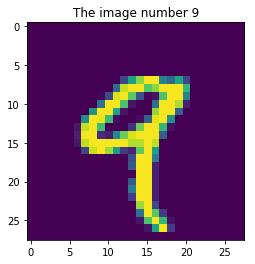

In [9]:
# So we separated the row into `our_label` and `our_flat_image`. Think of these are our `y` and our `x`
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
plt.title(f'The image number {onehotted_label}')
numpy_array = np.array(normalized_image)
plt.imshow(numpy_array.reshape(28, 28))
our_flat_image = np.array(numpy_array)
print(f' The row shape {row_3.shape}')
print(f' The flat image shape {numpy_array.shape}')
print(f' The reshaped image shape {numpy_array.reshape(28, 28).shape}')

Cool! 

So we have a better understanding of the data we were working with. So to review what we have done:
- We read **5** rows from a training csv using a very powerful csv library `pandas`
- A single row has a shape of (785, )
- The *y* label is in the first column index 0. Removing it makes the row shape (784, )
- As referenced in [MNIST](http://yann.lecun.com/exdb/mnist/) They say the image shape is *"the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field"*. The images are 28x28, and the remaining row has a **shape 784**, which means that you can sqrt(784) and get 28. This means we can **cleanly** reshape it into a 28x28 2d matrix.
- Finally we saw how to convert classification labels **our y** into normlized data using one hot. This is not the only way to normalize data, however it will prove useful. The pipeline for handling our labels is so:
    -  y &rarr; one hot &rarr; neural net train &rarr; neural net eval &rarr; argmax neural net predictions &rarr; get our predictions to look like our labels! On other words...
    -  3 (ourlabel) &rarr; [0, 0, 0, 1] &rarr; training loop &rarr; prediction = model(x) &rarr; np.argmax(prediction) &rarr; 3 (assuming the model learned well) 

We have also made use of the `numpy` library! This is a library that uses Python / C bindings for extremely fast matrix calculations. This allows use to use the simplicity of Python with the power or C. In fact, you could create a decent neural net from scratch using only numpy. **Numpy like pandas, is a massive go-to library for data science / expensive math operations**


#### Major Things to Realize
A single image when turned into a numpy array is of shape (784, ). **This is a not row**. Neither is (785, )! You might get major dimension errors if you do not consider this. (784, ) currently is treated as "785 rows". In reality, we want it to be in the shape (1, 784) meaning "1 row of 784 **features / columns**". You might be a lot of issues if you do not understand this. and is resolved by doing:


In [10]:
print(f' {numpy_array.shape} says "784 rows". Doesn\'t make sense, this is one row. Also known as a 1d matrix.')

print(f'\n The examples below you would think are 1d matrices because there is only 1 row, but that would be wrong. ')
print(f' {numpy_array.reshape(1, -1).shape} says "1 row, 784 features / columns". Better, \'1\' means 1 row, \'-1\' means dump everything else.')
print(f' {np.expand_dims(numpy_array, 0).shape} says same as above. We basically shove an extra dimension at index \'0\'')
print(f' {numpy_array[np.newaxis, :].shape} says the same also. We add a new axis to the start.')

 (784,) says "784 rows". Doesn't make sense, this is one row. Also known as a 1d matrix.

 The examples below you would think are 1d matrices because there is only 1 row, but that would be wrong. 
 (1, 784) says "1 row, 784 features / columns". Better, '1' means 1 row, '-1' means dump everything else.
 (1, 784) says same as above. We basically shove an extra dimension at index '0'
 (1, 784) says the same also. We add a new axis to the start.


## Dataset Continuation
We have said a lot, but lets more formally set up our *x* and *y*.

In [11]:
# Lets do this again but get super cerial this time.
df = pd.read_csv(os.path.join(absolute_path_to_mnist, 'mnist_train.csv'), nrows=200)

y = df['5'].values # Get the column '5', get the numpy array.
print(f' {y}')
# Get all the other columns (5 is in index 0, so we ignore it doing [1:] instead of just [:])
remaining_columns = df.columns[1:] 
x = df[remaining_columns].values # Get just the numpy array
print(f' Our x shape {x.shape}')
print(f' Our y shape {y.shape}')
y = y.reshape(-1, 1)
print(f' Fixed y shape {y.shape}')

 [0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0
 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3
 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9 3
 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6 7
 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1 7
 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1]
 Our x shape (200, 784)
 Our y shape (200,)
 Fixed y shape (200, 1)


Ok final thing, If we were prediction a **continuous** value, then y only needs to have 1 feature.  Meaning that the final output is some continous values. **It is typically faster to train by doing a classification problem as opposed to a continuous problem.** The continuous problem is something like "what is the temperature going to be tomorrow", and classification problem is "is this image a cat or a dog?". *What are we trying to do?* We are trying to predict "is this image a cat or a dog", or "is this image a 0, a 1, a 2 ...". We absolutely could turn this into a continuous problem, but why would we? We have 10 known classes, so lets have a model that can do classification. So the y values will be converted into a (N, 10) shape.

In [12]:
class_y = np.zeros((y.shape[0], 10))
print(f' {class_y.shape} is our new y samples. Each row is a sample, and there are 10 classes.')
print(f' {y.shape} currently has 5 samples, but 1 value. this is "ok" will be weirder to think about.\n')
print(f' {class_y} \n\n This is a new y. 5 samples by 10 classes :)\n\n')
class_y[np.arange(y.shape[0]), y[:, 0]] = 1
print(f' {class_y} \n\n Now we have a revised y with 10 classes. The \'1\' is the "correct" class. \n\n')
print(f' We can get the original y values easily doing {np.argmax(class_y, axis=1)}')
print(' Experiment with the axis part. In numpy the axis param provides different ways a function can be done on some matrix')

 (200, 10) is our new y samples. Each row is a sample, and there are 10 classes.
 (200, 1) currently has 5 samples, but 1 value. this is "ok" will be weirder to think about.

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

 This is a new y. 5 samples by 10 classes :)


 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] 

 Now we have a revised y with 10 classes. The '1' is the "correct" class. 


 We can get the original y values easily doing [0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0
 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3
 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9 3
 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6 7
 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4

In [13]:
# Y is normalized, lets do X (nothing changes, just as easy)
y = class_y.copy()
x = x / 255
print(f' Y final shape: {y.shape} X final shape: {x.shape}. Looking good!')

 Y final shape: (200, 10) X final shape: (200, 784). Looking good!


# Model Building
Ok so as seen above, we have a pipeline of stripping data from a csv and making sure it is the correct shape.

A safe data format is typically:

*x.shape &rarr; (N Samples, F Features)*

*y.shape &rarr; (N Samples, K Classes)*


So as shown in the previous section, we got 5 rows from the csv. So:

`N = 5`

How many labels are we trying to predict? We are trying to predict whether an image is a 0, 1, 2, ... 9. In other words, there are 10 classes, 10 labels that we are trying t predict. So:

`K = 10`

How many features are we using to make this prediction? **All of the image pixels**. We are using all of the image pixels to predict a label. Kind of a "duh" thing to say. We are doing image classification, so you would think this is an obvious thing to say. The images are 28x28, so have a total of 784 pixels. So:

`F = 784`

So:

x.shape is (5, 784)

y.shape is (5, 10)

In [14]:
import torch 
# Ref: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_nn.html
model = torch.nn.Sequential(
    torch.nn.Linear(x.shape[1], 128),
    torch.nn.Tanh(),
    torch.nn.Linear(128, 16),
    torch.nn.Tanh(),
    torch.nn.Linear(16, y.shape[1]),
)

Boom! We have our neural net. Super easy with using the pytorch library (torch). It is great that we organized our samples above. This means that we want a model that does:

x &rarr; Linear Layer &rarr; Activation Function &rarr; Linear Layer &rarr; pred_y

But what do we do with `y`? We will:
1. Use `y` to show our model how *wrong* it is so it can improve, and... 
2. To get our model's accuracy. I mean, we want to know how good our model is right??

We are using Linear Layers in this example. They are (in my opinion) the simplest elements in a neural net both in frameworks like this, and in custom from-scratch neural nets. 

**Linear Layer Qualities**

Some Pros:
- Simple
- Each neuron in a layer connects to all the neurons in the next layer, thus can represent some pretty complex features

Some (Big) Cons:
- Each neuron in a layer connects to all the neurons in the next layer... This means they will be extremely slow to learn, and scale badly for large data samples. What if we feed it images 500x500? MNIST is only 28x28. Conceptually simple linear model can jump to gigabytes of weights / parameters if too many linear connections are being used. Also, some images have a lot of *useless* space such as a sky. We want our neural net to leverage common big features. For example, if we want to recognize faces we might be interested in eyes, mouths, ears. Lineary layers will put *equal importance* on every pixel..

This is why it is normally common to have a single linear layer at the end of a complex model with other layers. However, MNIST images are small, so we can get away will using Linear Layers here.

**Activation Functions**

There are many activation functions. These decide when a single neuron "fires". Here are a few:
- ReLU
- LeakyReLU
- Tanh
- Sigmoid
- Softmax

There are many more [Activation Functions](https://en.wikipedia.org/wiki/Activation_function).

**Neural Net Description**

We are using the pytorch `Sequential Module` for structuring our Neural Net. We certainly do not have to use it to make the same type of model, but this is much simpler. A simple and common neural net involves one layer passing its activations to next layer then the next then the next till it gets to the last layer.

![Some Text](../../res/neural_net.png)

Remember that `x.shape` is `(N, 784)` and so `x.shape[1]` is 784. So `Linear(x.shape[1], 64)` says we want to feed in samples with 784 features, and output 64 activations. **Now why did we choose 64?** Well... just because? Hidden layer sizes are usually chosen based on how well certain sizes affect the model accuracy / training time. The only times that hidden layer sizes matter typically is when using more complex layers such as convolutional neural nets. 

Our Neural Net is pretty simple, so after `Linear(x.shape[1], 64)` and the activation, we get to our output layer `Linear(64, y.shape[1])`. So `Linear(x.shape[1], 64)` and `Linear(64, y.shape[1])` need to be connected, the the first's output needs to be the same as the next's input. `Linear(64, y.shape[1])` is our output layer, so its output is the number of features of `y` which is the number of classes we are predicting. 

In [15]:
# This is our loss function. This will decide how wrong the model's predictions are. To be more technical, 
# it is how much the gradients are changing. If the gradients flatten out, 
# it is not / does not need to learn anymore (in its opinion).
# There are many loss functions, each is better for different types of data. Some even allow for inputing 
# raw categories, meaning you don't need to do all that onehot complexity. We are using Mean Squared Error because
# it is a very basic loss function and is very common. Definitely experiment with other loss functions!
loss_fn = torch.nn.MSELoss(reduction='sum')
# How long we will allow the model to train. There is a balance between too few epochs 
# (not giving the model enough time to learn) and too many (the model starts to overfit, 
# or basically memorize the data).
epochs = 150
# This is how fast the model learns per epoch. 

# Too high and it learns too quickly ex:
# The moment you show it a white dog, it immediately thinks all dogs are white.
# Then you show it a black dog and it immediately thinks all dogs are black.
# ... Then you show it the white dog again and it thinks all dogs are white ...
# It ends up bouncing back and forth.

# Too low and it takes FOREVER to learn and possibly overfits on the training set... 
# Again, hopefully you have realized right now... you need to experiment!
learning_rate = 1e-3  # Same as 0.0001

# Reference https://datascience.stackexchange.com/questions/32651/what-is-the-use-of-torch-no-grad-in-pytorch/32654
# and https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615
y_tensor = torch.tensor(y).float()
x_tensor = torch.tensor(x).float()
print(y_tensor.shape)
batch_indices = np.arange(y_tensor.shape[0])
batch_size = 5
print(batch_indices)

torch.Size([200, 10])
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


In [16]:
# Explainations are from https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_nn.html
for t in range(epochs):
    print(f' Epoch {t}')
    losses = []
    for batch in range(0, y_tensor.shape[0], batch_size):
        batch_x = x_tensor[batch_indices[batch:batch+batch_size]]
        batch_y = y_tensor[batch_indices[batch:batch+batch_size]]
        # Forward pass: compute predicted y by passing x to the model. Module objects
        # override the __call__ operator so you can call them like functions. When
        # doing so you pass a Tensor of input data to the Module and it produces
        # a Tensor of output data.
        # (Josiah): model(x) is where you can get your predictions. You will see later outside of this loop that
        # we use it for verification / regular usage.
        y_pred = model(batch_x)

        # Compute and print loss. We pass Tensors containing the predicted and true
        # values of y, and the loss function returns a Tensor containing the
        # loss.
        # (Josiah): Prediction and Actual Y... How wrong are they? By how much do we need to change the neuron weights?
        # This is decided by the loss function
        loss = loss_fn(y_pred, batch_y)
        losses.append(loss.detach())

        # Zero the gradients before running the backward pass.
        model.zero_grad()

        # Backward pass: compute gradient of the loss with respect to all the learnable
        # parameters of the model. Internally, the parameters of each Module are stored
        # in Tensors with requires_grad=True, so this call will compute gradients for
        # all learnable parameters in the model.
        loss.backward()

        # Update the weights using gradient descent. Each parameter is a Tensor, so
        # we can access its gradients like we did before.
        # (Josiah): Note you should also look at optimizers https://pytorch.org/docs/stable/optim.html
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
    print(f' Average Loss {np.average(losses)}')

 Epoch 0
 Average Loss 5.18560791015625
 Epoch 1
 Average Loss 4.114232063293457
 Epoch 2
 Average Loss 3.7042129039764404
 Epoch 3
 Average Loss 3.4253952503204346
 Epoch 4
 Average Loss 3.1998543739318848
 Epoch 5
 Average Loss 3.007658004760742
 Epoch 6
 Average Loss 2.8397257328033447
 Epoch 7
 Average Loss 2.6905808448791504
 Epoch 8
 Average Loss 2.5567660331726074
 Epoch 9
 Average Loss 2.436028242111206
 Epoch 10
 Average Loss 2.3267757892608643
 Epoch 11
 Average Loss 2.227745294570923
 Epoch 12
 Average Loss 2.1378235816955566
 Epoch 13
 Average Loss 2.0559659004211426
 Epoch 14
 Average Loss 1.9811804294586182
 Epoch 15
 Average Loss 1.9125398397445679
 Epoch 16
 Average Loss 1.8492017984390259
 Epoch 17
 Average Loss 1.7904249429702759
 Epoch 18
 Average Loss 1.7355749607086182
 Epoch 19
 Average Loss 1.6841224431991577
 Epoch 20
 Average Loss 1.635634183883667
 Epoch 21
 Average Loss 1.589760184288025
 Epoch 22
 Average Loss 1.5462223291397095
 Epoch 23
 Average Loss 1.504

Wow cool! Thats a lot of numbers!!

So how do we know whether this model is good? Do we just deploy it now?
Good question! There is a massive area of machine learning just devoted to figuring out if a model is good, and will work well in the real world!

# Model Output / Analysis
Ok, so lets allow the model train on a larger number of samples. Go back to: (Under Dataset Continuation)
```python
# Lets do this again but get super cerial this time.
df = pd.read_csv(os.path.join(absolute_path_to_mnist, 'mnist_train.csv'), nrows=5)
```
And make this:
```python
# Lets do this again but get super cerial this time.
df = pd.read_csv(os.path.join(absolute_path_to_mnist, 'mnist_train.csv'), nrows=50)
```
If nrows is None, it will read *all of them*. There are approximately 60,000 samples :O! Which is why we only started with 5. You are free to try `None`, however you will notice this simple neural net does not scale well. After you train it, lets see if it can predict a number!

In [17]:
with torch.no_grad():  # We are not trying to train anything, so lets make sure that pytorch knows this.
    some_sample_x = x[0] # Get first sample / first row
    print(f' {some_sample_x.shape} lets make this (1, 784). It will work without doing this, however we want to be consistent')
    some_sample_x = some_sample_x.reshape(1, -1)
    print(f' {some_sample_x.shape} better')
    # The mode will be expecting "floats" so lets make sure the sample is a float
    some_sample_x = torch.tensor(some_sample_x).float()
    print(f' {some_sample_x.shape}')
    
    prediction = model(some_sample_x)
    print(f' {prediction}')

 (784,) lets make this (1, 784). It will work without doing this, however we want to be consistent
 (1, 784) better
 torch.Size([1, 784])
 tensor([[ 1.1043,  0.0671, -0.1477,  0.0470, -0.1308,  0.0051,  0.0022,  0.0194,
          0.0153, -0.0605]])


... Sooo this is our prediction? OH YEAH! We need to get the argmax!

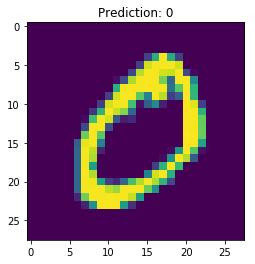

In [18]:
plt.title(f'Prediction: {np.argmax(prediction)}')
plt.imshow(some_sample_x.reshape(28, 28))
plt.show()

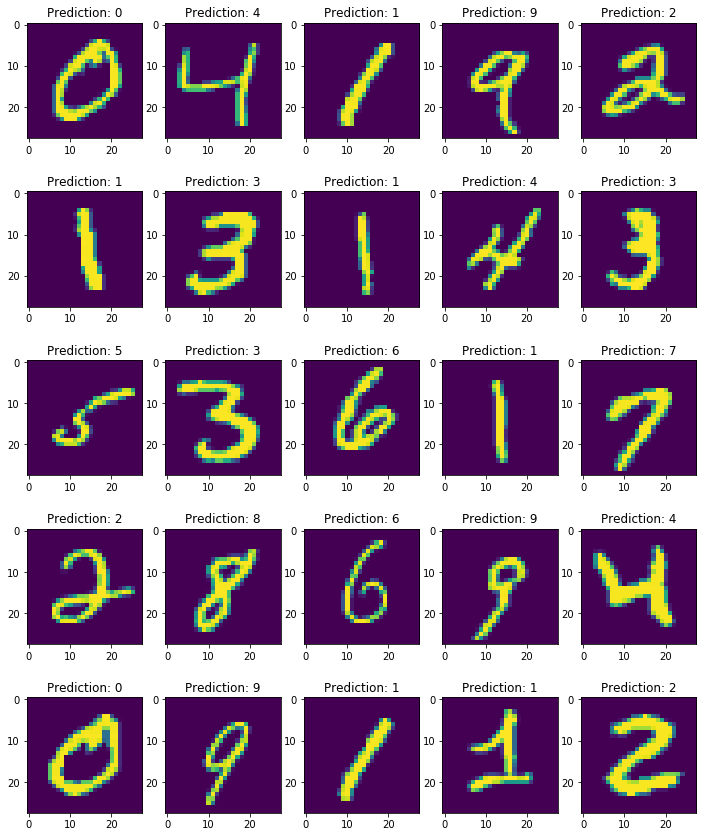

In [19]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,15)

# Lets look at a bunch of them
fig  = plt.Figure()
plt.xticks([])
plt.yticks([])
plt.grid(False)
with torch.no_grad():
    for i, some_sample_x in enumerate(x[:25]):
        plt.subplot(5, 5, i+1)
        prediction = model(torch.tensor(some_sample_x).float().reshape(1, -1))
        plt.title(f'Prediction: {np.argmax(prediction)}')
        plt.imshow(some_sample_x.reshape(28, 28))
plt.show()

In [20]:
# Lets see the accuracy score!
with torch.no_grad():
    predictions = model(x_tensor)
    # Lets get the scalar labels of the predictions and actuals
    prediction_labels = np.argmax(predictions.numpy(), axis=1) 
    actual_labels = np.argmax(y, axis=1)
    # Count how many were correct (model predicts 5, actual is 5, awesome its correct!)
    n_correct = np.sum(prediction_labels == actual_labels)
    # Number of correct predictions divided by the total number of samples
    accuracy = n_correct / np.size(actual_labels)
    print(f' The accuracy is {accuracy * 100}%')

 The accuracy is 100.0%


Wow! That was easy! We already have a classifier that can look at an image, and determine what kind of character it is! The only concern we should have about this is **this accuracy is based on images that the model as already seen**... What is our goal? **Our goal is to have a model that can _generalize_**. Meaning, given the training data, the model should be able to work just as well on images it has never seen before. If a human knows what a white dog looks like, that human would be able to know that a black dog is also a dog. Similarly, our model knows what a number '5' looks like from the training set, it should know what a '5' looks like that is maybe upside down! 

Ok... So instead of doing:
```python
x = df[remaining_columns].values
y = df['5'].values
```
we need to split these into:
```python
x = df[remaining_columns].values
y = df['5'].values
training_x = x * .75%
test_x = x * .25%
training_y = y * .75%
test_y = y * .25%
```
Above is fake code, but hopefully you get the point. Lets split x and y, and put 75% of the samples into our **_training_** sets (what we will train our model on), and 25% of the samples into our **_test_** sets (how we will determine how "good" our model is).

In [21]:
# Remember, x's shape is (N, 784) where N is the total number of labels
indices = np.arange(x.shape[0])
training_index_partition = indices[:int(indices.shape[0] * .75)]
test_index_partition = indices[int(indices.shape[0] * .75):]
training_x = torch.tensor(x[training_index_partition]).float()
training_y = torch.tensor(y[training_index_partition]).float()
test_x = torch.tensor(x[test_index_partition]).float()
test_y = torch.tensor(y[test_index_partition]).float()
print(f' Train x, y shapes {(training_x.shape, training_y.shape)}')
print(f' Test x, y shapes {(test_x.shape, test_y.shape)}')

 Train x, y shapes (torch.Size([150, 784]), torch.Size([150, 10]))
 Test x, y shapes (torch.Size([50, 784]), torch.Size([50, 10]))


Awesome, so if we load 200 rows, we expect there to be 150 samples in the train set, and 50 in the test set! Also note, that you can `shuffle(indices)` can randomize the samples in your test and train sets. So lets see if our model _actually_ works.

In [22]:
model = torch.nn.Sequential(
    torch.nn.Linear(x.shape[1], 128),
    torch.nn.Tanh(),
    torch.nn.Linear(128, y.shape[1]),
)
for t in range(epochs):
    print(f' Epoch {t}')
    losses = []
    for batch in range(0, training_y.shape[0], batch_size):
        batch_x = training_x[batch_indices[batch:batch+batch_size]]
        batch_y = training_y[batch_indices[batch:batch+batch_size]]
        y_pred = model(batch_x)

        loss = loss_fn(y_pred, batch_y)
        losses.append(loss.detach())

        model.zero_grad()

        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
    print(f' Average Loss {np.average(losses)}')

 Epoch 0
 Average Loss 4.4926323890686035
 Epoch 1
 Average Loss 3.396969795227051
 Epoch 2
 Average Loss 2.8410046100616455
 Epoch 3
 Average Loss 2.487013339996338
 Epoch 4
 Average Loss 2.2398064136505127
 Epoch 5
 Average Loss 2.0547404289245605
 Epoch 6
 Average Loss 1.9091800451278687
 Epoch 7
 Average Loss 1.7906181812286377
 Epoch 8
 Average Loss 1.691535472869873
 Epoch 9
 Average Loss 1.6070725917816162
 Epoch 10
 Average Loss 1.5339034795761108
 Epoch 11
 Average Loss 1.4696508646011353
 Epoch 12
 Average Loss 1.4125605821609497
 Epoch 13
 Average Loss 1.3613051176071167
 Epoch 14
 Average Loss 1.314863681793213
 Epoch 15
 Average Loss 1.2724395990371704
 Epoch 16
 Average Loss 1.2334030866622925
 Epoch 17
 Average Loss 1.1972525119781494
 Epoch 18
 Average Loss 1.1635844707489014
 Epoch 19
 Average Loss 1.1320719718933105
 Epoch 20
 Average Loss 1.1024471521377563
 Epoch 21
 Average Loss 1.074489712715149
 Epoch 22
 Average Loss 1.0480166673660278
 Epoch 23
 Average Loss 1.

In [23]:
# Lets see the accuracy score of images that our model has never seen!
with torch.no_grad():
    prediction_labels = np.argmax(model(test_x).numpy(), axis=1)
    actual_labels = np.argmax(test_y.numpy(), axis=1)
    # Count how many were correct (model predicts 5, actual is 5, awesome its correct!)
    accuracy = np.sum(prediction_labels == actual_labels) / np.size(actual_labels)
    print(f' The accuracy is {accuracy * 100}%')

 The accuracy is 80.0%


Ah... Interesting. This is a much more useful metric! So (supposedly) our model will be 82% accurate when running in the real world. 

/Users/jlaivins/anaconda3/envs/master36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


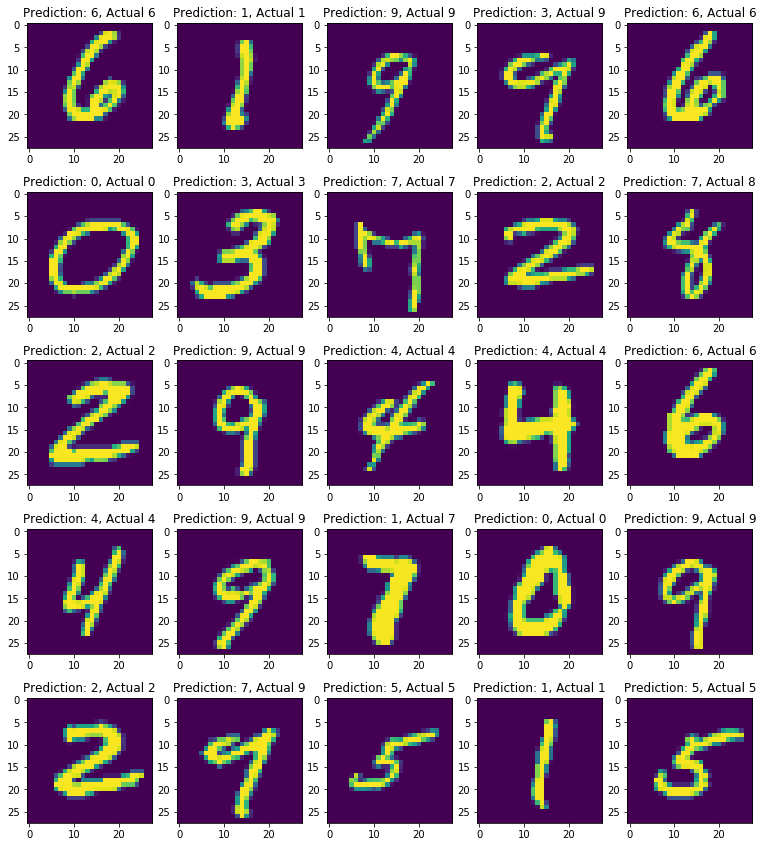

In [24]:
mpl.rcParams['figure.figsize'] = (13,15)
# Lets look at a bunch of them
fig  = plt.Figure()
plt.xticks([])
plt.yticks([])
plt.grid(False)
with torch.no_grad():
    for i, some_sample_x in enumerate(test_x[:25].clone().detach()):
        plt.subplot(5, 5, i+1)
        prediction = model(torch.tensor(some_sample_x).float().reshape(1, -1))
        plt.title(f'Prediction: {np.argmax(prediction.clone().detach())}, Actual {np.argmax(test_y[i])}')
        plt.imshow(some_sample_x.reshape(28, 28))
plt.show()

The interesting thing is that a lot of the model's mistakes seem understandable, and maybe with more data it would perform better. This whole thing of getting models to do better on data they haven't seen versus have seen is one of the biggest challenges in machine learning. 

# Summary
So where do we go from here? You will notice that if you load all 60,000 samples the model trains very slowly. Also 82% accuracy is not desirable. So what are some options that we can try?
- [Dropout (Modules)](https://pytorch.org/docs/stable/_modules/torch/nn/modules/dropout.html): Kill a percent of neuron activations so that the model is less likely to just _memorize_ the training set. Also [examples](https://www.programcreek.com/python/example/107689/torch.nn.Dropout)
- [Convolutional Layers](https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/) Instead of treating each pixel equally, instead use the pixel and its neighbors to determine if that neuron should fire. This also means **our model will be smaller some there will be fewer neuron weights / connects to evaluate**.
- More Layers!
- Different Activations!
- Different loss functions!
- [Image Augmentation](https://colab.research.google.com/drive/109vu3F1LTzD1gdVV6cho9fKGx7lzbFll) One problem with neural nets, and why they require so much data, is because if we show it a white dog, then show it the same white dog but moved to the right 20 pixels, it suddenly has no idea what animal it is. This is because the position matters! We can get around this by taking a dog picture, and generate a bunch of variations of the image (flip it horz / vert, shift up down right left, spin 5 degrees 30 degrees, add noise like random white pixels). 